## A jupyter notebook version file for the `main.py`


Set `autoreload` to execute the change in `.py` files.


In [23]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [24]:
import _pickle
from pathlib import Path
import gc
import os

os.environ["CUDA_VISIBLE_DEVICES"] = "0"

from __utils__ import image_processing
from __utils__ import label_processing
from __utils__ import feature_processing
from __utils__ import labeling
from __utils__ import loso_preparing
from __utils__ import functions

In [25]:
dataset_dir = "D:/Databases/CAS(ME)^2"
# dataset_dir = "F:/HEH/Databases/CAS(ME)^2"
# dataset_dir = "/data/disk1/heh/databases/CAS(ME)^2"

images_loading = False
image_size = 128
load_cropped_images = False
# expression_type = "mae"  # macro-expression spotting
expression_type = "me"  # micro-expression spotting
debug_preds = True
labeling_function = "pseudo_labeling"
# labeling_function = "original_labeling"
model_names = {
    0: "SOFTNet",
    1: "SOFTNetCBAM",
    2: "ViT-B",
    3: "SL-ViT-B",
    4: "Swin-T",
    5: "Swin-S",
    6: "L-Swin-T",
    7: "S-Swin-T",
    8: "SL-Swin-T",
    9: "SL-Swin-S",
}
model_name = model_names[8]
batch_size = 48
epochs = 25
save_preds = False
preds_stem = (
    f"{expression_type}_"
    + model_name.lower().replace("-", "_")
    + f"_batch_size_{batch_size}"
    + f"_epochs_{epochs}"
    + f"_{labeling_function}"
    + f"_{image_size}"
    + "_3"
)
preds_path = Path(dataset_dir, "preds", preds_stem).with_suffix(".pkl")
print(f"preds_path: {preds_path}")

preds_path: D:\Databases\CAS(ME)^2\preds\me_sl_swin_t_batch_size_48_epochs_25_pseudo_labeling_128_3.pkl


## Load Images


When debug the image processing, the videos_images is from cropped_rawpic, whereas the other variables are from rawpic.


In [26]:
videos_images, subjects, subjects_videos_code = image_processing.load_images(
    dataset_dir,
    images_loading=images_loading,
    image_size=image_size,
    load_cropped_images=load_cropped_images,
)

subject:  s15
subject:  s16
subject:  s19
subject:  s20
subject:  s21
subject:  s22
subject:  s23
subject:  s24
subject:  s25
subject:  s26
subject:  s27
subject:  s29
subject:  s30
subject:  s31
subject:  s32
subject:  s33
subject:  s34
subject:  s35
subject:  s36
subject:  s37
subject:  s38
subject:  s40


In [27]:
print("subjects:", subjects)
print("subjects_videos_code:", subjects_videos_code)

subjects: ['s15', 's16', 's19', 's20', 's21', 's22', 's23', 's24', 's25', 's26', 's27', 's29', 's30', 's31', 's32', 's33', 's34', 's35', 's36', 's37', 's38', 's40']
subjects_videos_code: [['0101', '0102', '0401', '0402', '0502', '0503', '0505', '0508'], ['0101', '0102', '0401', '0402', '0502', '0505', '0507'], ['0102', '0402', '0505', '0507', '0502'], ['0502'], ['0101', '0401'], ['0101', '0102', '0402', '0503', '0508'], ['0102', '0402', '0503', '0507'], ['0101', '0401', '0402', '0502', '0507'], ['0101', '0102', '0502', '0508'], ['0101', '0102', '0401', '0503'], ['0101', '0102', '0401', '0402', '0502', '0503', '0505', '0507', '0508'], ['0502'], ['0101', '0102', '0401', '0502', '0503', '0505', '0507'], ['0101', '0401', '0402', '0502', '0503', '0505', '0507'], ['0101', '0102', '0401', '0402', '0502', '0503', '0505', '0507', '0508'], ['0102', '0402'], ['0401', '0402', '0503'], ['0102'], ['0401', '0505'], ['0101', '0402', '0502', '0505', '0507', '0508'], ['0502', '0507'], ['0401', '0502', '

## Load Excel 


In [28]:
Excel_data = label_processing.load_excel(dataset_dir)
Excel_data.head(5)

,participant,video_name_&_expression_number,onset,apex,offset,AUs,extimated_emotion,expression_type,self-reported_emotion,video_name,video_code,subject
0,1,anger1_1,557,572,608,4+10+14+15,negative,macro-expression,anger,anger1,0401,s15
1,1,anger1_2,2854,2862,2871,38,others,macro-expression,sadness,anger1,0401,s15
2,1,anger2_1,2155,2163,0,NaN,negative,macro-expression,anger,anger2,0402,s15
3,1,anger2_2,3363,3371,3383,4+7+14,negative,macro-expression,anger,anger2,0402,s15
4,1,anger2_3,3380,3386,3407,4+14+38,negative,macro-expression,anger,anger2,0402,s15


## Load Ground Truth Labels


In [29]:
(
    clean_videos_images,
    clean_subjects_videos_code,
    clean_subjects,
    clean_subjects_videos_ground_truth_labels,
) = label_processing.load_ground_truth_labels(
    dataset_dir,
    expression_type,
    videos_images,
    subjects_videos_code,
    subjects,
    Excel_data,
)

required_videos_index:  [1, 4, 8, 9, 12, 13, 14, 16, 28, 33, 36, 37, 38, 45, 46, 47, 49, 50, 52, 54, 55, 57, 62, 64, 67, 71, 73, 74, 77, 83, 87, 91, 93]
len(clean_videos_images) = 33


In [30]:
print("len(clean_subjects): ", len(clean_subjects))
print("clean_subjects: ", clean_subjects)
print("len(clean_subjects_videos_code): ", len(clean_subjects_videos_code))
print("clean_subjects_videos_codes: ", clean_subjects_videos_code)
print(
    "len(clean_subjects_videos_ground_truth_labels): ",
    len(clean_subjects_videos_ground_truth_labels),
)
print(
    "clean_subjects_videos_ground_truth_labels: ",
    clean_subjects_videos_ground_truth_labels,
)

len(clean_subjects):  14
clean_subjects:  ['s15' 's16' 's19' 's23' 's24' 's25' 's27' 's29' 's30' 's31' 's32' 's35'
 's37' 's38']
len(clean_subjects_videos_code):  14
clean_subjects_videos_codes:  [['0102', '0502'], ['0101', '0102', '0502', '0505', '0507'], ['0402'], ['0102'], ['0401', '0507'], ['0101', '0102'], ['0101', '0102', '0401', '0502', '0503', '0507'], ['0502'], ['0101', '0401'], ['0101', '0402', '0505'], ['0401', '0502', '0503', '0508'], ['0102'], ['0402', '0508'], ['0507']]
len(clean_subjects_videos_ground_truth_labels):  14
clean_subjects_videos_ground_truth_labels:  [[[[698, 706]], [[137, 147]]], [[[551, 564]], [[269, 277]], [[322, 333]], [[395, 406], [1694, 1709], [1879, 1894]], [[1957, 1967], [2284, 2294]]], [[[1926, 1941]]], [[[330, 345], [525, 539], [726, 739]]], [[[607, 620], [962, 976], [1889, 1901], [2180, 2192], [3440, 3452]], [[1835, 1847], [1950, 1964], [3232, 3247]]], [[[112, 126]], [[995, 1007], [1007, 1016], [1017, 1033]]], [[[873, 887]], [[33, 47], [308, 316],

## Calculate `k`


In [31]:
k = label_processing.calculate_k(clean_subjects_videos_ground_truth_labels)

k (Half of average length of expression) =  6


## Extract Features


It takes about 260 m.


Compute Optical Flow Features (shape = [128, 128, 3])


In [32]:
# clean_videos_images_features = feature_processing.extract_features(
#     clean_videos_images, k, image_size=128
# )

## Pre-Processing


It takes about 44 m.


In [33]:
# resampled_clean_videos_images_features = feature_processing.pre_process(
#     clean_videos_images, clean_videos_images_features, k
# )

### Dump Resampled Clean Videos Images Features


In [34]:
# with open(
#     Path(
#         dataset_dir,
#         f"resampled_clean_videos_images_{expression_type}_features_{image_size}",
#     ).with_suffix(".pkl"),
#     "wb",
# ) as pkl_file:
#     _pickle.dump(resampled_clean_videos_images_features, pkl_file)
#     pkl_file.close()

### Load Resampled Clean Videos Images Features


In [35]:
if debug_preds is False:
    with open(
        Path(
            dataset_dir,
            f"resampled_clean_videos_images_{expression_type}_features_{image_size}",
        ).with_suffix(".pkl"),
        "rb",
    ) as pkl_file:
        resampled_clean_videos_images_features = _pickle.load(pkl_file)
        pkl_file.close()

In [36]:
if debug_preds is False:
    print(
        "len(resampled_clean_videos_images_features): ",
        len(resampled_clean_videos_images_features),
    )
    print(
        "len(resampled_clean_videos_images_features[0]): ",
        len(resampled_clean_videos_images_features[0]),
    )
    print(
        "resampled_clean_videos_images_features[0][0].shape: ",
        resampled_clean_videos_images_features[0][0].shape,
    )

## Labeling


In [37]:
if labeling_function == "pseudo_labeling":
    labels = labeling.get_pseudo_labels(
        clean_videos_images, clean_subjects_videos_ground_truth_labels, k
    )
elif labeling_function == "original_labeling":
    labels = labeling.get_original_labels(
        clean_videos_images, clean_subjects_videos_ground_truth_labels, k
    )

Total frames: 80463


## Prepare for LOSO


In [38]:
if debug_preds is False:
    X, y, groups = loso_preparing.legacy_prepare_for_loso(
        resampled_clean_videos_images_features,
        labels,
        clean_subjects,
        clean_videos_images,
        clean_subjects_videos_ground_truth_labels,
        k,
    )

In [39]:
if debug_preds is False:
    del resampled_clean_videos_images_features
    gc.collect()

## Training


In [40]:
if debug_preds is False:
    from __utils__.training import train

    preds = train(
        X=X,
        y=y,
        groups=groups,
        image_size=image_size,
        expression_type=expression_type,
        model_name=model_name,
        train_or_not=True,
        batch_size=batch_size,
        epochs=epochs,
    )
else:
    with open(preds_path, "rb") as pkl_file:
        preds = _pickle.load(pkl_file)
        pkl_file.close()

In [41]:
if save_preds is True:
    with open(preds_path, "wb") as pkl_file:
        _pickle.dump(preds, pkl_file)
        pkl_file.close()

## Spotting and Evaluation


Split 1/14 is in process.
0 video(s) have been processed.


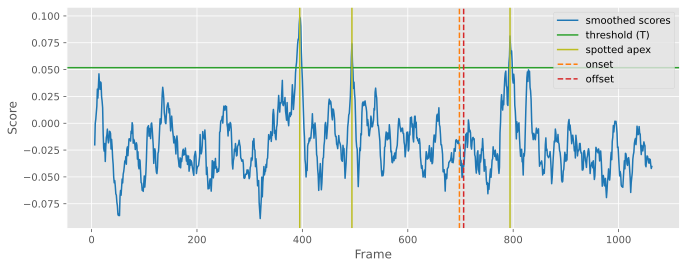

The current video be processed: subject s15, video 0102


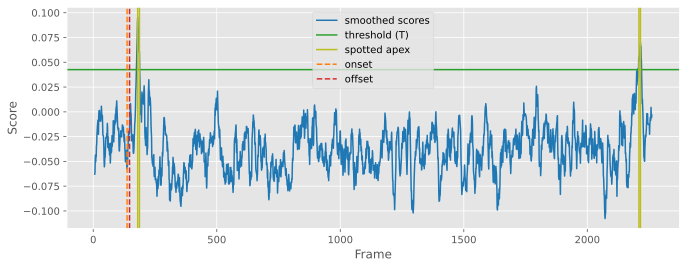

The current video be processed: subject s15, video 0502

True Positive: 0, False Posive: 7, False Negative: 2
Precision = 2.220446049250313e-16, Recall =2.220446049250313e-16, F1-Score = 4.440892098500626e-16
Split 1/14 is processed.

Split 2/14 is in process.
2 video(s) have been processed.


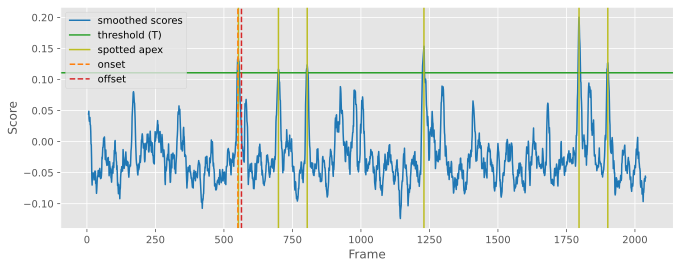

The current video be processed: subject s16, video 0101


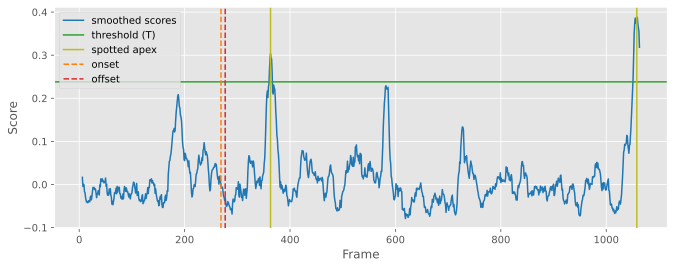

The current video be processed: subject s16, video 0102


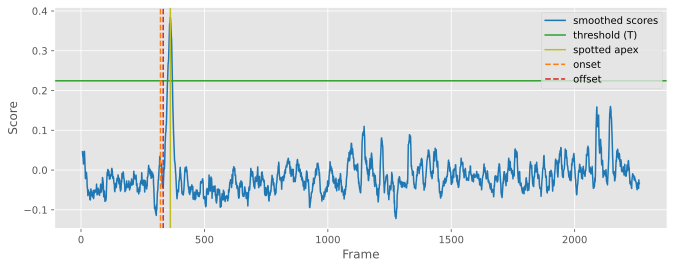

The current video be processed: subject s16, video 0502


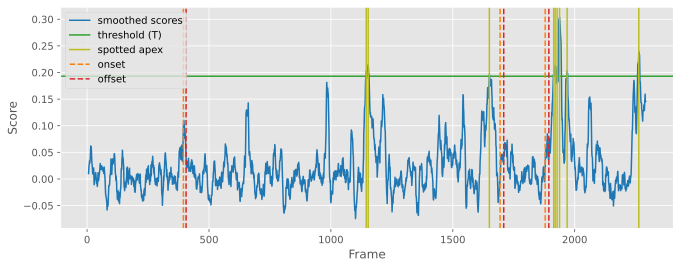

The current video be processed: subject s16, video 0505


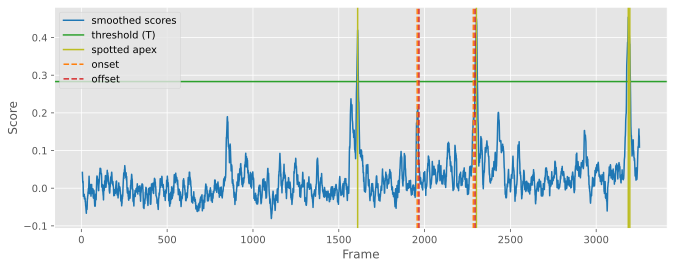

The current video be processed: subject s16, video 0507

True Positive: 0, False Posive: 29, False Negative: 10
Precision = 2.220446049250313e-16, Recall =2.220446049250313e-16, F1-Score = 4.440892098500626e-16
Split 2/14 is processed.

Split 3/14 is in process.
7 video(s) have been processed.


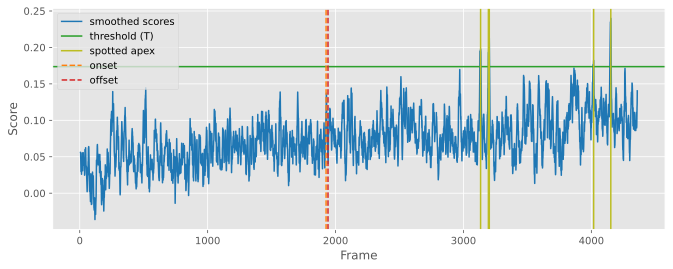

The current video be processed: subject s19, video 0402

True Positive: 0, False Posive: 34, False Negative: 11
Precision = 2.220446049250313e-16, Recall =2.220446049250313e-16, F1-Score = 4.440892098500626e-16
Split 3/14 is processed.

Split 4/14 is in process.
8 video(s) have been processed.


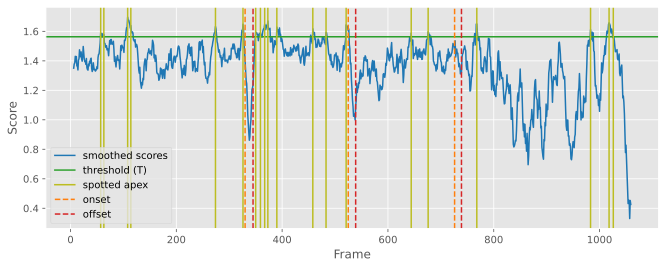

The current video be processed: subject s23, video 0102

True Positive: 0, False Posive: 54, False Negative: 14
Precision = 2.220446049250313e-16, Recall =2.220446049250313e-16, F1-Score = 4.440892098500626e-16
Split 4/14 is processed.

Split 5/14 is in process.
9 video(s) have been processed.


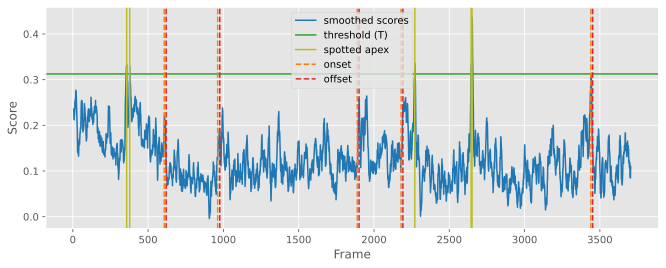

The current video be processed: subject s24, video 0401


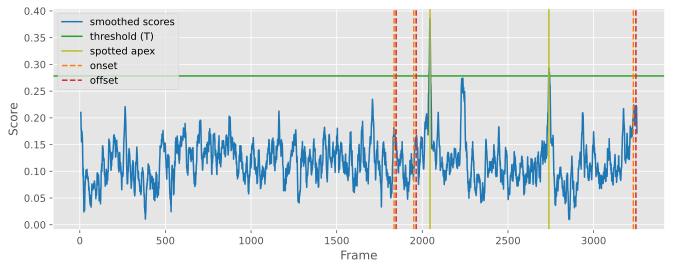

The current video be processed: subject s24, video 0507

True Positive: 0, False Posive: 61, False Negative: 22
Precision = 2.220446049250313e-16, Recall =2.220446049250313e-16, F1-Score = 4.440892098500626e-16
Split 5/14 is processed.

Split 6/14 is in process.
11 video(s) have been processed.


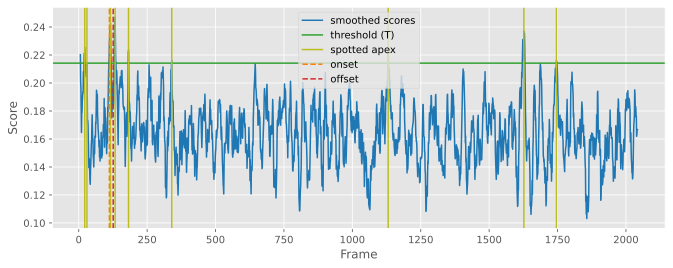

The current video be processed: subject s25, video 0101


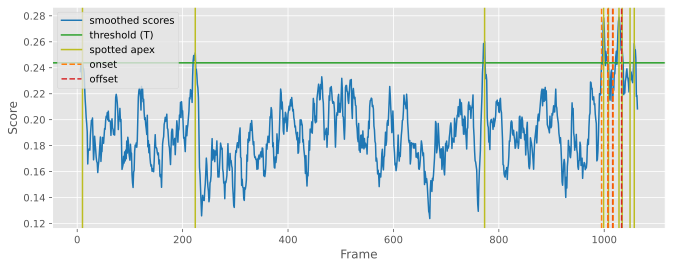

The current video be processed: subject s25, video 0102

True Positive: 4, False Posive: 75, False Negative: 22
Precision = 0.050632911392405285, Recall =0.15384615384615408, F1-Score = 0.0761904761904767
Split 6/14 is processed.

Split 7/14 is in process.
13 video(s) have been processed.


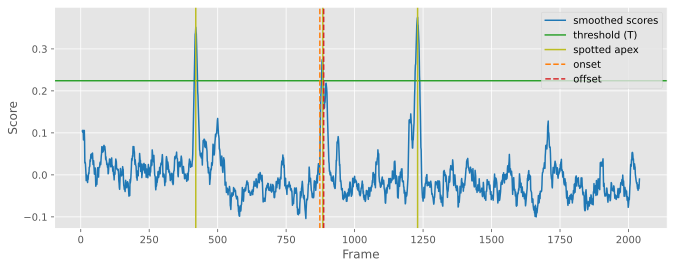

The current video be processed: subject s27, video 0101


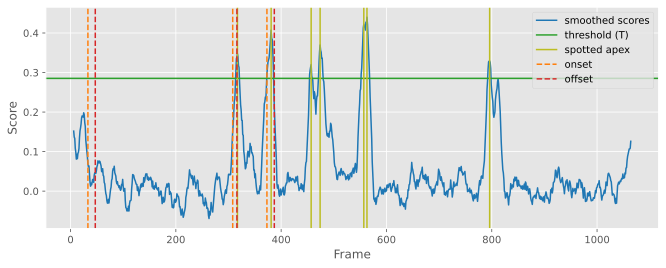

The current video be processed: subject s27, video 0102


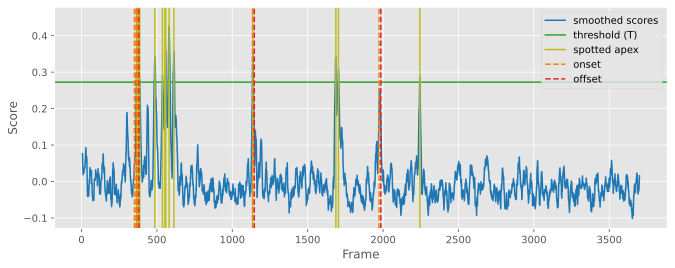

The current video be processed: subject s27, video 0401


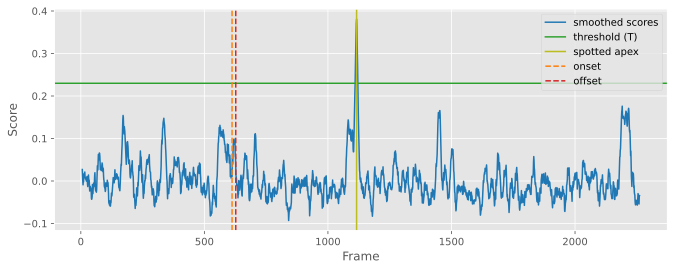

The current video be processed: subject s27, video 0502


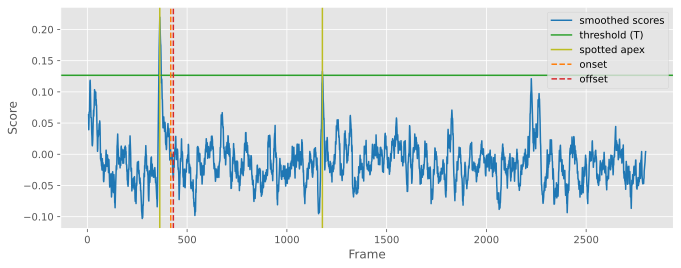

The current video be processed: subject s27, video 0503


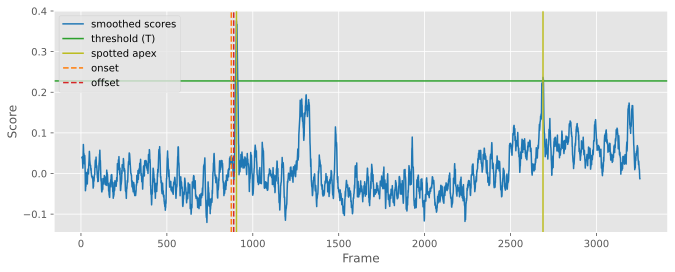

The current video be processed: subject s27, video 0507

True Positive: 8, False Posive: 100, False Negative: 29
Precision = 0.07407407407407429, Recall =0.21621621621621645, F1-Score = 0.1103448275862074
Split 7/14 is processed.

Split 8/14 is in process.
19 video(s) have been processed.


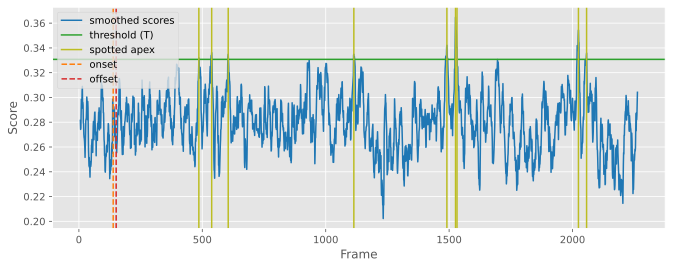

The current video be processed: subject s29, video 0502

True Positive: 8, False Posive: 109, False Negative: 30
Precision = 0.0683760683760686, Recall =0.2105263157894739, F1-Score = 0.10322580645161343
Split 8/14 is processed.

Split 9/14 is in process.
20 video(s) have been processed.


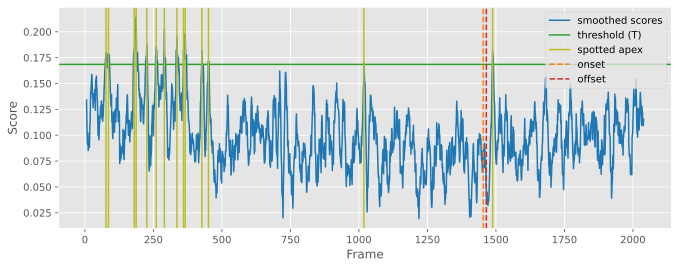

The current video be processed: subject s30, video 0101


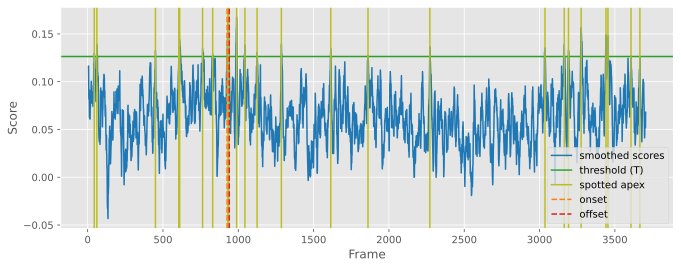

The current video be processed: subject s30, video 0401

True Positive: 9, False Posive: 146, False Negative: 31
Precision = 0.05806451612903248, Recall =0.22500000000000023, F1-Score = 0.09230769230769283
Split 9/14 is processed.

Split 10/14 is in process.
22 video(s) have been processed.


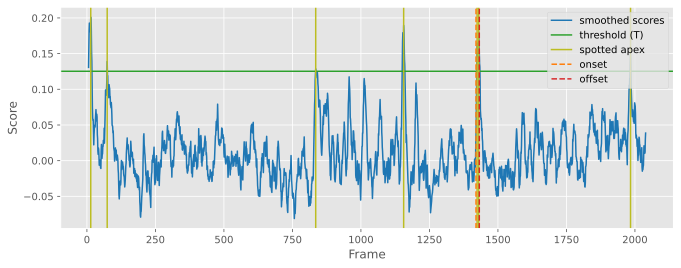

The current video be processed: subject s31, video 0101


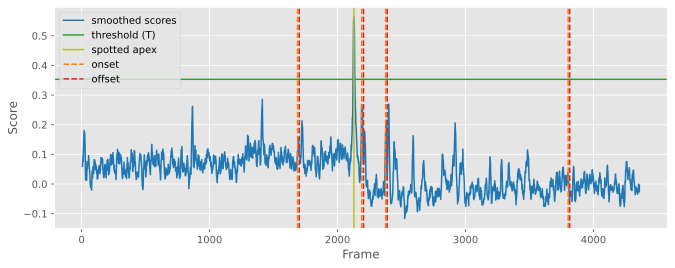

The current video be processed: subject s31, video 0402


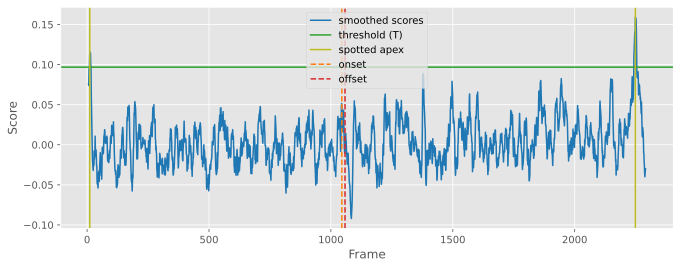

The current video be processed: subject s31, video 0505

True Positive: 10, False Posive: 155, False Negative: 36
Precision = 0.06060606060606083, Recall =0.2173913043478263, F1-Score = 0.09478672985782041
Split 10/14 is processed.

Split 11/14 is in process.
25 video(s) have been processed.


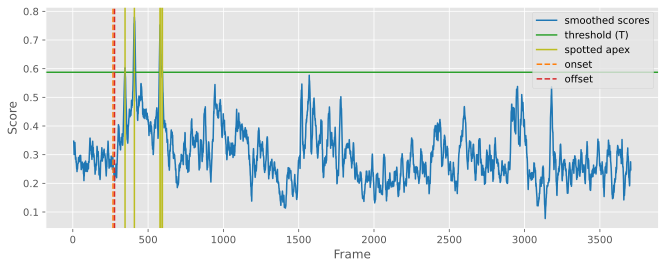

The current video be processed: subject s32, video 0401


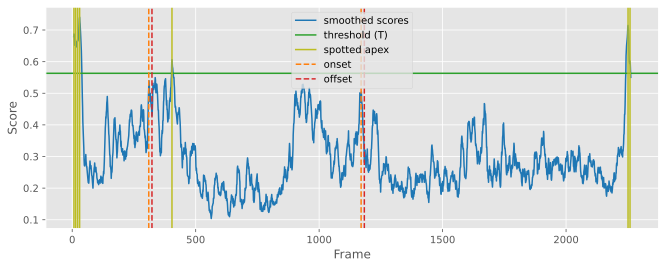

The current video be processed: subject s32, video 0502


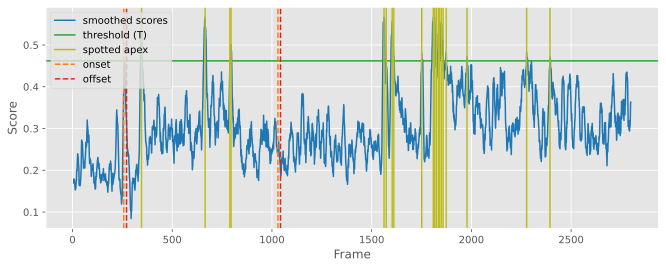

The current video be processed: subject s32, video 0503


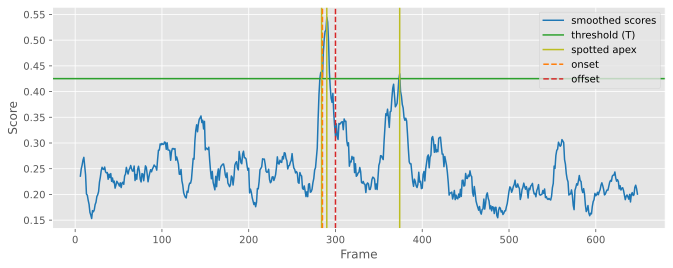

The current video be processed: subject s32, video 0508

True Positive: 11, False Posive: 189, False Negative: 41
Precision = 0.05500000000000022, Recall =0.21153846153846176, F1-Score = 0.08730158730158782
Split 11/14 is processed.

Split 12/14 is in process.
29 video(s) have been processed.


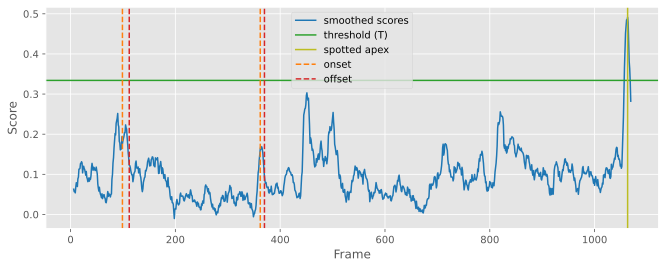

The current video be processed: subject s35, video 0102

True Positive: 11, False Posive: 190, False Negative: 43
Precision = 0.0547263681592042, Recall =0.20370370370370391, F1-Score = 0.08627450980392208
Split 12/14 is processed.

Split 13/14 is in process.
30 video(s) have been processed.


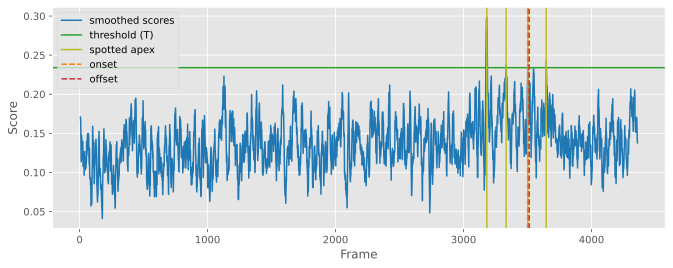

The current video be processed: subject s37, video 0402


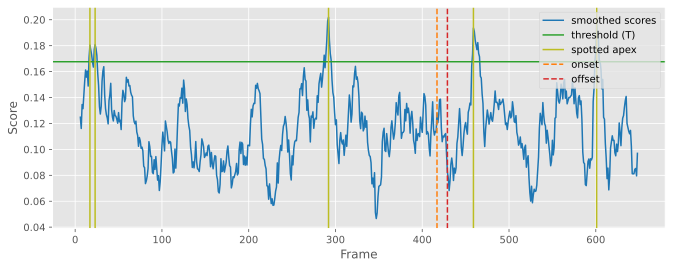

The current video be processed: subject s37, video 0508

True Positive: 12, False Posive: 198, False Negative: 44
Precision = 0.05714285714285736, Recall =0.2142857142857145, F1-Score = 0.09022556390977494
Split 13/14 is processed.

Split 14/14 is in process.
32 video(s) have been processed.


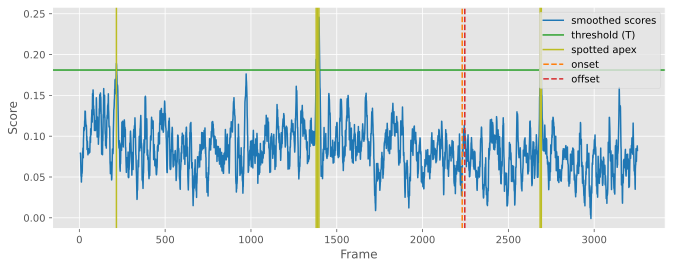

The current video be processed: subject s38, video 0507

True Positive: 12, False Posive: 204, False Negative: 45
Precision = 0.055555555555555775, Recall =0.2105263157894739, F1-Score = 0.08791208791208842
Split 14/14 is processed.



In [42]:
metric_fn, result_dict = functions.spot_and_evaluate(
    preds,
    clean_subjects_videos_ground_truth_labels,
    clean_videos_images,
    clean_subjects,
    clean_subjects_videos_code,
    k,
    p=0.60,
    show_plot_or_not=True,
)

## Final Evaluation


In [43]:
functions.final_evaluate(metric_fn, result_dict)

True Positive: 12, False Posive: 204, False Negative: 45
Final Precision = 0.055555555555555775,
Final Recall =0.2105263157894739,
Final F1-Score = 0.08791208791208842

Highest Precision = 0.07407407407407429,
Highest Recall =0.22500000000000023,
Highest F1-Score = 0.1103448275862074


| Parameters | Value | Value | Value |
| --- | --- | --- | --- |
| model | SL-Swin-T | SL-Swin-T | SL-Swin-T |
| epochs | 20 (505 m) | 25 (593 m) | 30 (695 m) |
| batch_size | 32 | 32 | 32 |
| p | 0.86 | 0.77 | | 0.59 |
| True Positive | 7 | 5 | |
| False Positive | 51 | 88 | |
| False Negative | 50 | 52 | |
| Precision | 0.1207 | 0.0537 | |
| Recall | 0.1228 | 0.0877 | |
| F1-Score | 0.1217 | 0.0666 | |


| Parameters | Value | Value | Value |
| --- | --- | --- | --- |
| model | SL-Swin-T | SL-Swin-T | SL-Swin-T |
| epochs | 20 (311 m) | 20 (311 m) | 30 (410 m) |
| batch_size | 48 | 48 | 48 |
| p | 0.57 | 0.59 | 0.55 |
| True Positive | 15 | 15 | 13 |
| False Positive | 244 | 221 | 289 |
| False Negative | 42 | 42 | 44 |
| Precision | 0.0579 | 0.0636 | 0.0430 |
| Recall | 0.2632 | 0.2632 | 0.2280 |
| F1-Score | 0.0949 | 0.1024 | 0.0724 |


| Parameters | Value | Value | Value | Value |
| --- | --- | --- | --- | --- |
| model | SL-Swin-T | SL-Swin-T | SL-Swin-T_2 | SL-Swin-T_3 |
| epochs | 25 (325 m) | 25 (325 m) | 25 (325 m) | 25 (325 m) |
| batch_size | 48 | 48 | 48 | 48 |
| p | 0.57 | 0.59 | 0.60 | 0.60 |
| True Positive | 14 | 14 | 13 | 12 |
| False Positive | 266 | 239 | 226 | 204 |
| False Negative | 43 | 43 | 44 | 45 |
| Precision | 0.0500 | 0.0553 | 0.0544 | 0.0556 |
| Recall | 0.2456 | 0.2456 | 0.2281 | 0.2105 |
| F1-Score | 0.0830 | 0.0903 | 0.0878 | 0.0879 |


| Parameters | Value | Value | Value | Value | Value |
| --- | --- | --- | --- | --- | --- |
| model | ViT-B | SL-ViT-B | Swin-T | L-Swin-T | S-Swin-T |
| epochs | 25 ( m) | 25 ( m) | 25 ( m) | 25 (568 m) | 25 (364 m) |
| batch_size | 48 | 96 | 48 | 48 | 48 |
| p | 0.60 | 0.70 | 0.57 | 0.51 | 0.49 | 
| True Positive | 4 | 11 | 13 | 10 | 16 | 
| False Positive | 444 | 166 | 262 | 339 | 354 | 
| False Negative | 53 | 46 | 44 | 47 | 41 | 
| Precision | 0.0089 | 0.0621 | 0.0473 | 0.0287 | 0.0432 | 
| Recall | 0.0702 | 0.1930 | 0.2281 | 0.1754 | 0.2807 | 
| F1-Score | 0.0158 | 0.0940 | 0.0783 | 0.0493 | 0.0749 | 


Original Labeling


| Parameters | Value | Value |
| --- | --- | --- |
| model | Swin-T | SL-Swin-T |
| epochs | 25 | 25 |
| batch_size | 48 | 48 |
| p | 0.58 | 0.60 |
| True Positive | 8 | 14 |
| False Positive | 237 | 262 |
| False Negative | 49 | 43 |
| Precision | 0.0327 | 0.0507 |
| Recall | 0.1404 | 0.2456 |
| F1-Score | 0.0503 | 0.0841 |


### Stretched (Deprecated)


| Parameters | Value | Value | Value (tf) | Value (tf) | Value | Value |
| --- | --- | --- | --- | --- | --- | --- |
| model | 3D-CNN | SOFTNet | SOFTNet | SOFTNet (dev) | SOFTNet | SOFTNet |
| epochs | | 10 | 20 (39 m)| 20 (39 m) | 35 (54 m) | 20 (28 m) |
| batch_size | | 48 | 48 | 48 | 48 | 48 |
| learning_rate | | 0.0005 | 0.0005 | 0.0005 | 0.0005 | 0.0005 |
| True Positive | | 20 | 19 | 16 | 20 | 20 |
| False Positive | | 264 | 252 | 238 | 285 | 409 |
| False Negative | | 37 | 38 | 41 | 37 | 37 |
| Precision | | 0.0704 | 0.0701 | 0.0629 | 0.0655 | 0.0466 |
| Recall | | 0.3509 | 0.3333 | 0.2807 | 0.3508 | 0.3508 |
| F1-Score | 0.0714 | 0.1173 | 0.1159 | 0.1028 | 0.1104 | 0.0823 |


without pos_embedding


| Parameters | Value 1 | Value 2 | Value 3 | Value 4 | Value 5 | Value 6 | Value 7 |
| --- | --- | --- | --- | --- | --- | --- | --- |
| model | SL-Swin-T | SL-Swin-T | SL-Swin-T | SL-Swin-T | SL-Swin-T | SL-Swin-T | SL-Swin-T |
| epochs | 20 (392 m) | 25 (531 m) | 30 (581 m) | 20 (382 m) | 30 (437 m) | 35 (499 m) | 50 (784 m) |
| batch_size | 32 | 32 | 32 | 48 | 48 | 48 | 48 |
| learning_rate | 0.0005 | 0.0005 | 0.0005 | 0.0005 | 0.0005 | 0.0005 | 0.0005 |
| True Positive | 14 | 17 | 11 | 10 | 11 | 11 | 11 |
| False Positive | 354 | 363 | 360 | 366 | 348 | 357 | 380 |
| False Negative | 43 | 40 | 46 | 47 | 46 | 46 | 46 |
| Precision | 0.0380 | 0.0447 | 0.0296 | 0.0265 | 0.0306 | 0.0298 | 0.0281 |
| Recall | 0.2456 | 0.2982 | 0.1929 | 0.1754 | 0.1929 | 0.1929 | 0.1929 |
| F1-Score | 0.0658 | 0.0778 | 0.0514 | 0.0461 | 0.0528 | 0.0517 | 0.0491 |


with pos_embedding


| Parameters | Value | Value | Value | Value | Value |
| --- | --- | --- | --- | --- | --- |
| model | SL-Swin-T | SL-Swin-T | SL-Swin-T | SL-Swin-T | SL-Swin-T |
| epochs | 25 (987 m) | 20 (389 m) | 25 (489 m) | 30 (611 m) | 25 (350 m) |
| batch_size | 16 | 32 | 32 | 32 | 48 |
| learning_rate | 0.0005 | 0.0005 | 0.0005 | 0.0005 | 0.0005 |
| True Positive | 11 | 12 | 16 | 13 | 11 |
| False Positive | 325 | 342 | 370 | 335 | 371 |
| False Negative | 46 | 45 | 41 | 44 | 46 |
| Precision | 0.0327 | 0.0338 | 0.0414 | 0.0375 | 0.0287 |
| Recall | 0.1929 | 0.2105 | 0.2807 | 0.2280 | 0.1929 |
| F1-Score | 0.0559 | 0.0583 | 0.0722 | 0.0641 | 0.0501 |


## Ablation Study


In [44]:
ablation_dict = functions.ablation_study_p_dev(
    preds,
    clean_subjects_videos_ground_truth_labels,
    clean_videos_images,
    clean_subjects,
    clean_subjects_videos_code,
    k,
)

 p | TP | FP | FN | Precision | Recall | F1-Score
0.01 | 44 | 4705 | 13 | 0.0093 | 0.7719 | 0.0183 |
0.02 | 44 | 4482 | 13 | 0.0097 | 0.7719 | 0.0192 |
0.03 | 44 | 4287 | 13 | 0.0102 | 0.7719 | 0.0201 |
0.04 | 44 | 4071 | 13 | 0.0107 | 0.7719 | 0.0211 |
0.05 | 44 | 3889 | 13 | 0.0112 | 0.7719 | 0.0221 |
0.06 | 41 | 3697 | 16 | 0.0110 | 0.7193 | 0.0216 |
0.07 | 41 | 3513 | 16 | 0.0115 | 0.7193 | 0.0227 |
0.08 | 39 | 3320 | 18 | 0.0116 | 0.6842 | 0.0228 |
0.09 | 38 | 3147 | 19 | 0.0119 | 0.6667 | 0.0234 |
0.10 | 37 | 2970 | 20 | 0.0123 | 0.6491 | 0.0242 |
0.11 | 37 | 2793 | 20 | 0.0131 | 0.6491 | 0.0256 |
0.12 | 36 | 2632 | 21 | 0.0135 | 0.6316 | 0.0264 |
0.13 | 34 | 2505 | 23 | 0.0134 | 0.5965 | 0.0262 |
0.14 | 34 | 2370 | 23 | 0.0141 | 0.5965 | 0.0276 |
0.15 | 34 | 2230 | 23 | 0.0150 | 0.5965 | 0.0293 |
0.16 | 33 | 2109 | 24 | 0.0154 | 0.5789 | 0.0300 |
0.17 | 32 | 1987 | 25 | 0.0158 | 0.5614 | 0.0308 |
0.18 | 32 | 1873 | 25 | 0.0168 | 0.5614 | 0.0326 |
0.19 | 30 | 1763 | 27 | 0.0167 |